# Aggregations: Min, Max, and Everything In Between

Often when faced with a large amount of data, a first step is to compute summary statistics for the data in question.
Common summary stats are the <b>mean</b> and <b>standard deviation</b>, which allow you to summarize the "typical" values in a dataset, but other aggregates are useful as well (the <em>sum, product, median, minimum and maximum, quantiles</em>, etc.).

NumPy has fast built-in aggregation functions for working on arrays; we'll discuss and demonstrate some of them here.

## Summing the Values in an Array

As a quick example, consider computing the sum of all values in an array.
Python itself can do this using the built-in ``sum`` function:

In [1]:
import numpy as np

In [2]:
L = np.random.random(100)
print(L)
L.size #100 floats
print("sum is ", sum(L))

[0.61381878 0.01226724 0.90299694 0.00254354 0.21099359 0.95279512
 0.70719572 0.8174317  0.22736244 0.51349809 0.04702803 0.33082311
 0.83198696 0.06899986 0.50420874 0.66534815 0.72356286 0.13160269
 0.81674335 0.22684124 0.22248949 0.89292678 0.66271082 0.43307849
 0.97257612 0.91235488 0.7640194  0.01278758 0.81958393 0.17993269
 0.52660566 0.18666189 0.69627452 0.52711937 0.03084046 0.25487824
 0.91256381 0.03254041 0.13233585 0.23909896 0.36651434 0.86233899
 0.88562831 0.25273809 0.96571257 0.92581106 0.20045898 0.07823439
 0.25293641 0.70041256 0.18192988 0.45210462 0.2707908  0.44076921
 0.34276675 0.23663692 0.2858469  0.81203423 0.94927953 0.53938235
 0.75211132 0.61038433 0.581473   0.91578481 0.81315771 0.4231404
 0.57713522 0.41575535 0.64764422 0.65232924 0.1017273  0.66121259
 0.86484671 0.33955264 0.61486694 0.58069557 0.47291546 0.12290042
 0.56772587 0.45206479 0.24974881 0.52931112 0.68302272 0.99960601
 0.11944043 0.77219796 0.02214349 0.35977025 0.15527808 0.68281

The syntax is quite similar to that of NumPy's ``sum`` function, and the result is the same:

In [3]:
np.sum(L)



49.42297242946153

## Speed of NumPy functions
 Python was not originally designed for numeric computation. 
 Python became popular though, and the need for fast numeric computation arose. Numpy was created by a group of developers in 2005 to address this challenge.
Today in the era of AI, it would not have been possible to train Machine Learning algorithms without a fast numeric library such as Numpy.

Reasons behind NumPy speed:

- Numpy array is a collection of similar data-types that are densely packed in memory. 
- A Python list can have different data-types, which puts lots of extra constraints while doing computation on it.
- Numpy is able to divide a task into multiple subtasks and process them in parallel.

Compare and Contrast native Python functions and NumPy ones:

In [7]:
big_array = np.random.rand(1000000)
%timeit sum(big_array)
%timeit np.sum(big_array)

10 loops, best of 3: 168 ms per loop
1000 loops, best of 3: 360 µs per loop


Careful- the ``sum`` function and the ``np.sum`` function are not identical
- for example ``np.sum`` is aware of multiple array dimensions.

### Another way to check it:


In [8]:
big_array = np.random.rand(1000000)

import time
before = int(round(time.time()*1000))
np.sum(big_array)
after = int(round(time.time()*1000))
print("Numpy sum time: ", after-before, "milliseconds")


Numpy sum time:  1 milliseconds


In [9]:
## checking how native sum would do

ns_before = int(round(time.time() * 1000))
sum(big_array)
ns_after = int(round(time.time() * 1000))
print("Native sum time: ", ns_after-ns_before, "milliseconds")

Native sum time:  180 milliseconds


## Minimum and Maximum

Similarly, Python has built-in ``min`` and ``max`` functions, used to find the minimum value and maximum value of any given array:

In [10]:
min(big_array), max(big_array) # find biggest and smallest value from array

(1.9144128238224312e-07, 0.9999997343513788)

NumPy's corresponding functions have similar syntax, and again operate much more quickly:

In [ ]:
np.min(big_array), np.max(big_array)

(9.341265481133121e-07, 0.9999995874374884)

In [11]:
%timeit min(big_array)
%timeit np.min(big_array)

10 loops, best of 3: 103 ms per loop
1000 loops, best of 3: 421 µs per loop


For ``min``, ``max``, ``sum``, and several other NumPy aggregates, a shorter syntax is to use methods of the array object itself:

In [12]:
print(big_array.min(), big_array.max(), big_array.sum())

1.9144128238224312e-07 0.9999997343513788 499618.34257794596


Whenever possible, make sure that you are using the NumPy version of these aggregates when operating on NumPy arrays!

### Multi dimensional aggregates

One common type of aggregation operation is an aggregate along a row or column.
Say you have some data stored in a two-dimensional array:

In [ ]:
M = np.random.random((3, 4))
print(M)

[[0.97160319 0.14441144 0.00574223 0.79008484]
 [0.9791901  0.34189858 0.76172199 0.26220808]
 [0.37631391 0.55589007 0.93349802 0.70807968]]


By default, each NumPy aggregation function will return the aggregate over the entire array:

In [ ]:
M.sum()

6.830642124922296

Aggregation functions take an additional argument specifying the *axis* along which the aggregate is computed. For example, we can find the minimum value within each column by specifying ``axis=0``:

In [ ]:

M.min(axis=0)

array([0.37631391, 0.14441144, 0.00574223, 0.26220808])

The function returns four values, corresponding to the four columns of numbers.

Similarly, we can find the maximum value within each row:

In [ ]:
M.max(axis=1)

array([0.97160319, 0.9791901 , 0.93349802])

The way the axis is specified here can be confusing to users coming from other languages.
The ``axis`` keyword specifies the *dimension of the array that will be collapsed*, rather than the dimension that will be returned.
So specifying ``axis=0`` means that the first axis will be collapsed: for two-dimensional arrays, this means that values within each column will be aggregated.

## Example: What is the Average Height of US Presidents?

Aggregates available in NumPy can be extremely useful for summarizing a set of values.
For example, consider the heights of all US presidents.
This data is available in the file *president_heights.csv*, which is a comma-separated list of labels and values:

We'll use the Pandas package, which we'll explore separately, to read the file and extract this information

## 2 lines to load the file into Google colab environment

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving president_heights.csv to president_heights.csv


In [ ]:
import pandas as pd
data = pd.read_csv('president_heights.csv')
#print(data.columns.values)
#print(data['order'])
#print(data['name'])
#print(data['height(cm)'])
heights = np.array(data['height(cm)'])
#print(heights)

Now that we have this data array, we can compute a variety of summary statistics:

In [ ]:
print("Mean height:       ", heights.mean())
print("Standard deviation:", heights.std())
print("Minimum height:    ", heights.min())
print("Maximum height:    ", heights.max())

Mean height:        179.73809523809524
Standard deviation: 6.931843442745892
Minimum height:     163
Maximum height:     193


Note that in each case, the aggregation operation reduced the entire array to a single summarizing value, which gives us information about the distribution of values.
We may also wish to compute quantiles:

In [ ]:
print("25th percentile:   ", np.percentile(heights, 25))
print("Median:            ", np.median(heights))
print("75th percentile:   ", np.percentile(heights, 75))

25th percentile:    174.25
Median:             182.0
75th percentile:    183.0


We see that the median height of US presidents is 182 cm, or under six feet.

Of course, sometimes it's more useful to see a visual representation of this data, which we can accomplish using tools in Matplotlib, which we will discuss separately. 

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()  # set plot style

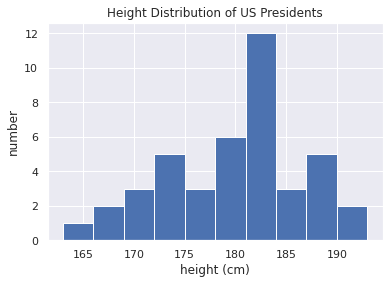

In [ ]:
plt.hist(heights)
plt.title('Height Distribution of US Presidents')
plt.xlabel('height (cm)')
plt.ylabel('number');



These aggregates are useful in exploratory data analysis